In [1]:
# Import SQLAlchemy and other dependencies here
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Float, Integer, String, Date
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

import pandas as pd
import numpy as np



In [2]:
# MatPlotLib/NumPy/SciPy
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
engine = create_engine('postgresql://postgres:9807775984@Bd@localhost:5432/marineMammals')
connection = engine.connect()

In [4]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [5]:
# Collect the names of tables within the database
inspector.get_table_names()

['marine_mammal']

In [6]:

# Using the inspector to print the column names within the 'marine_mammal' table and its types
columns = inspector.get_columns('marine_mammal')
for column in columns:
    print(column["name"], column["type"])

id VARCHAR(100)
species VARCHAR(65)
quantity NUMERIC
description VARCHAR(500)
url VARCHAR(200)
latitude NUMERIC
longitude NUMERIC
location VARCHAR
sighted_at DATE
created_at DATE
updated_at DATE
orca_type VARCHAR
orca_pod VARCHAR


In [7]:
#create marine_mammal class
class marine_mammal(Base):
    __tablename__ = 'marine_mammal'
    
    id = Column (String, primary_key=True)
    species = Column (String)
    quantity = Column (Integer)
    description = Column (String)
    url = Column (String)
    latitude = Column (Float)
    longitude = Column (Float)
    location = Column (String)
    sighted_at = Column (Date)
    created_at = Column (Date)
    updated_at = Column (Date)
    orca_type = Column (String)
    orca_pod = Column (String)

In [8]:
session = Session(engine)

In [9]:
marine_mammal_data = pd.read_sql("select * from marine_mammal", connection)

In [10]:
marine_mammal_data.head(3)

,id,species,quantity,description,url,latitude,longitude,location,sighted_at,created_at,updated_at,orca_type,orca_pod
0,5a049b7e686f743ec5040000,orca,5.0,"Spotted from the Edmonds-Kingston ferry, near ...",http://hotline.whalemuseum.org/sightings/5a049...,47.799530,-122.479967,None,2017-11-09,2017-11-09,2017-11-14,unknown,None
1,59d039a0686f743ec5020000,harbor porpoise,20.0,From the Inn at Langley looking east there was...,http://hotline.whalemuseum.org/sightings/59d03...,48.047448,-122.404776,"Camano Island, WA, US",2017-10-01,2017-10-01,2017-10-03,unknown,None
2,59ab6d65686f747484140000,humpback,1.0,"heading north in the Tacoma narrows,, between ...",http://hotline.whalemuseum.org/sightings/59ab6...,47.307289,-122.561674,"Gig Harbor, WA, US",2017-09-03,2017-09-03,2017-09-06,unknown,None


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


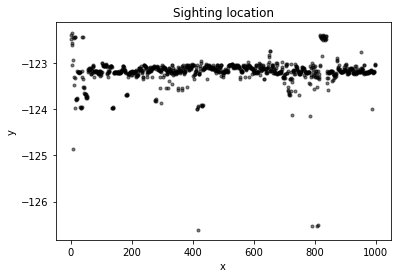

In [11]:
# Create data
df = pd.DataFrame (marine_mammal_data, columns = ['latitude','longitude'])
x = df.index.tolist()
y = df['longitude'].tolist()
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Sighting location')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
df1 = pd.DataFrame (marine_mammal_data, columns = ['location','species'])


In [13]:
df2=df1.groupby('location').count()
df2 = df2.rename(columns = {'species':'Signted_Qty'},inplace = False)
df2

,Signted_Qty
location,
"Allyn-Grapeview, WA, US",1
"Anacortes, WA, US",1
"Bainbridge Island, WA, US",6
"Blakely Island, WA, US",1
"Burien, WA, US",1
"Camano Island, WA, US",1
"Capital, BC, CA",1
"Coupeville, WA, US",1
"Delta, BC, CA",12


In [46]:
df2.sort_values(by=['Signted_Qty'], inplace=True, ascending=True)
df2=df2.head(10)

df2

C:\Users\BANDANA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Signted_Qty
location,
"Seattle, WA, US",10
"Port Renfrew, BC, CA",12
"Delta, BC, CA",12
"Mayne Island, BC, CA",17
"Victoria, BC, CA",18
"Sooke, BC, CA",29
"Juan de Fuca, BC, CA",30
"Pender Island, BC, CA",33
"Saturna, BC, CA",36


In [47]:
location = df2.index.tolist()
quantity=df2['Signted_Qty'].tolist() 
print(location)
print(quantity)

['Seattle, WA, US', 'Port Renfrew, BC, CA', 'Delta, BC, CA', 'Mayne Island, BC, CA', 'Victoria, BC, CA', 'Sooke, BC, CA', 'Juan de Fuca, BC, CA', 'Pender Island, BC, CA', 'Saturna, BC, CA', 'Friday Harbor, WA, US']
[10, 12, 12, 17, 18, 29, 30, 33, 36, 596]


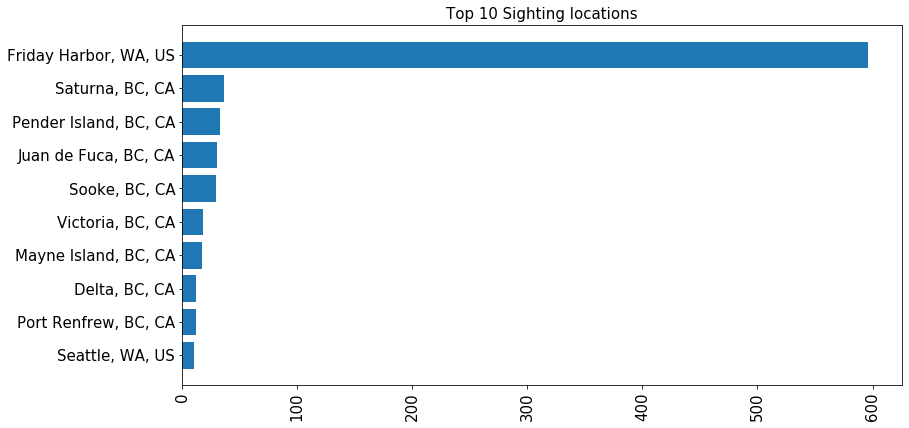

<Figure size 432x288 with 0 Axes>

In [48]:

#BAr Plot For Top 10 Sighting location

fig = plt.figure(figsize=(10,5),)
ax = fig.add_axes([0,0,1,1])
x = location
y = quantity 
ax.barh(x,y)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.title('Top 10 Sighting locations',size=15)

plt.show()
plt.savefig('Top_10_Sighting_locations.png')

In [17]:
df3=df1.groupby('species').count()
species=df3.index.tolist()
Quantity=df3['location'].tolist() 
df3 = df3.rename(columns = {'location':'Signted_Qty'},inplace = False)
df3

,Signted_Qty
species,
gray whale,1
harbor porpoise,1
humpback,3
orca,858


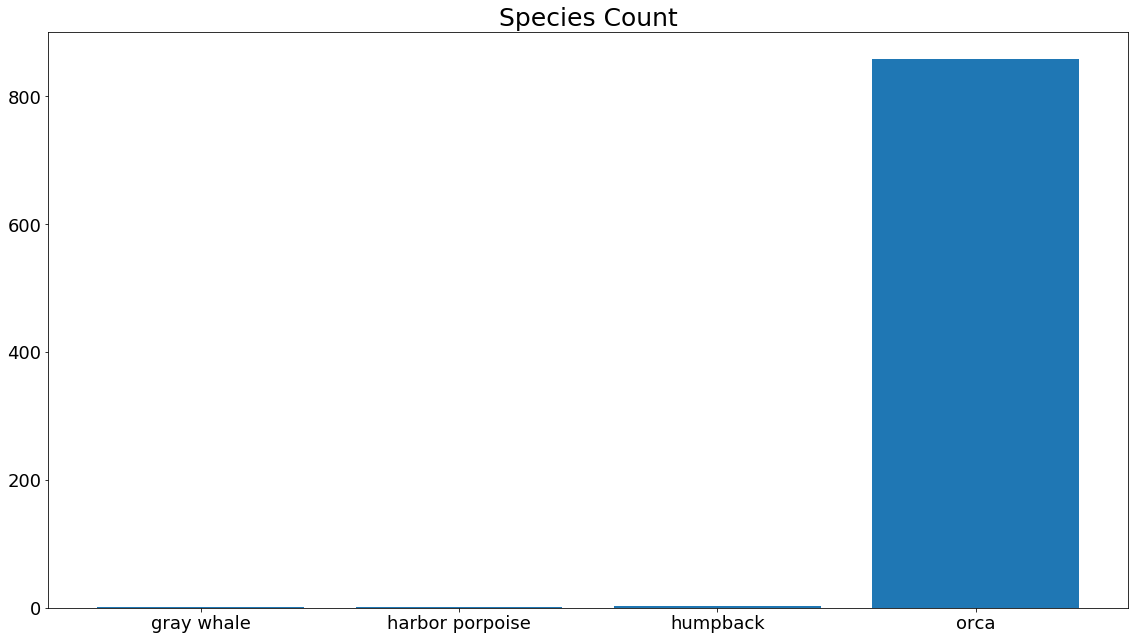

<Figure size 432x288 with 0 Axes>

In [18]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
x = species
y = Quantity
ax.bar(x,y)
plt.title('Species Count',size=25)
plt.xticks(rotation=0,fontsize=18)
plt.yticks(rotation=0,fontsize=18)
plt.show()
plt.savefig('species Count.png')

In [44]:
df4 = pd.DataFrame (marine_mammal_data, columns = ['sighted_at'])
#df4['counter'] = '1'

df4.head.unique()

AttributeError: 'function' object has no attribute 'unique'

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [34]:

df['YearMonth'] = pd.to_datetime(df['sighted_at']).map(lambda dt: dt.replace(day=1))

#res = df['YearMonth'].value_counts()

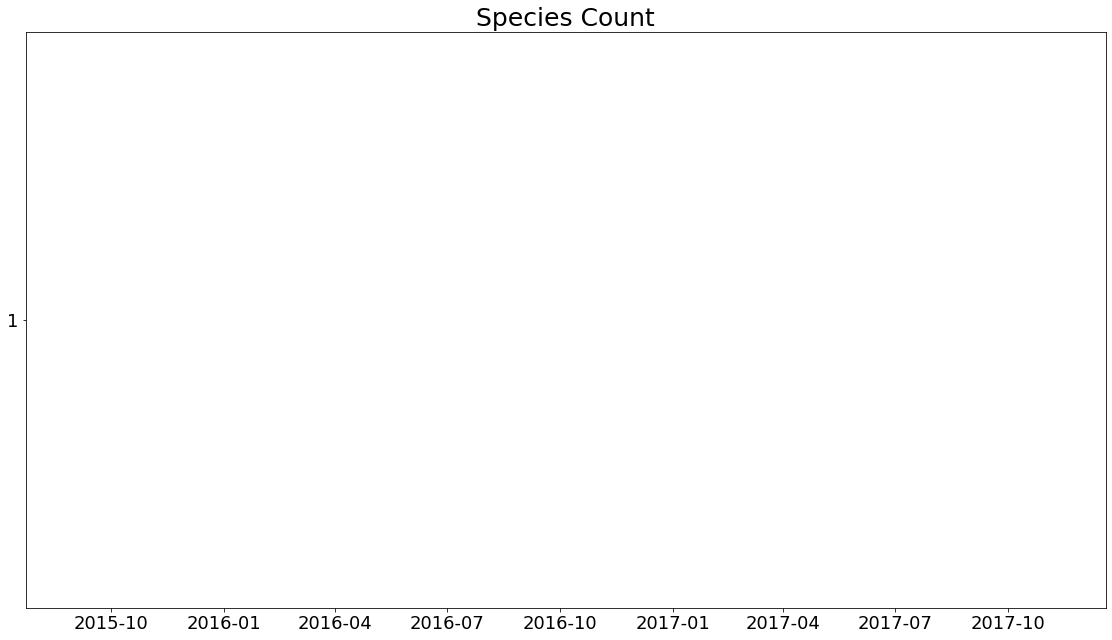

<Figure size 432x288 with 0 Axes>

In [35]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
x = df4['sighted_at'].tolist() 
y = df4['counter'].tolist() 
ax.bar(x,y)
plt.title('Species Count',size=25)
plt.xticks(rotation=0,fontsize=18)
plt.yticks(rotation=0,fontsize=18)
plt.show()
plt.savefig('')